# Alex Solovev

## Is there a correlation between the category of a startup, its success, and the most popular industry of a country?

An example for my reserach question would be: Would media startups be more successful in Los Angeles than in Moscow?

In [205]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

In [206]:
sns.set_theme(style="ticks",
              font_scale=1.3, # This scales the fonts slightly higher
             )

In [207]:
df = pd.read_csv('../data/raw/ks-projects-201801.csv')

## Milestone 3

In this milestone, I will manipulate with the data I have 

### Task 1. EDA

In [208]:
print("(Rows : Columns) respectively:", df.shape)
print("Columns in the dataset:", df.columns)

(Rows : Columns) respectively: (378661, 15)
Columns in the dataset: Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')


In [209]:
del df['ID']
del df['name']
del df['currency']
del df['deadline']
del df['goal']
del df['launched']
del df['pledged']
del df['usd pledged']

In [210]:
df.describe(include='float64').T

,count,mean,std,min,25%,50%,75%,max
usd_pledged_real,378661.0,9058.924074,9.097334e+04,0.00,31.0,624.33,4050.0,2.033899e+07
usd_goal_real,378661.0,45454.401465,1.152950e+06,0.01,2000.0,5500.00,15500.0,1.663614e+08


In [211]:
df.describe(include='object').T

,count,unique,top,freq
category,378661,159,Product Design,22314
main_category,378661,15,Film & Video,63585
state,378661,6,failed,197719
country,378661,23,US,292627


In [212]:
df.state.unique()

array(['failed', 'canceled', 'successful', 'live', 'undefined',
       'suspended'], dtype=object)

In [213]:
df.main_category.unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

### Task 2-3 Load Raw and Processed Data

In [214]:
import project_functions1 as pf1

**1. Unprocessed File**

In [215]:
df = pd.read_csv('../data/raw/ks-projects-201801.csv')
df

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


**2. Processed File**

*In the processed file, I filtered the numbers of pledged money, goals, and backers. Also, some columns that are unnesessery are deleted*

In [216]:
df_short = df[(df['usd_goal_real'] < 40000)
                   & (df['backers'] < 100)
                   & (df['usd_pledged_real'] < 15000)]
del df_short['ID']
del df_short['name']
del df_short['currency']
del df_short['deadline']
del df_short['goal']
del df_short['launched']
del df_short['pledged']
del df_short['usd pledged']

df_short

,category,main_category,state,backers,country,usd_pledged_real,usd_goal_real
0,Poetry,Publishing,failed,0,GB,0.0,1533.95
1,Narrative Film,Film & Video,failed,15,US,2421.0,30000.00
3,Music,Music,failed,1,US,1.0,5000.00
4,Film & Video,Film & Video,canceled,14,US,1283.0,19500.00
6,Food,Food,successful,16,US,1205.0,1000.00
...,...,...,...,...,...,...,...
378655,Poetry,Publishing,canceled,0,CA,0.0,4949.60
378657,Narrative Film,Film & Video,failed,5,US,155.0,1500.00
378658,Narrative Film,Film & Video,failed,1,US,20.0,15000.00
378659,Technology,Technology,failed,6,US,200.0,15000.00


### Task 4. Data Analysis

In the plot below, I showed that with the filtering I made, all the countries had most of the attempts to create startups in different main categories 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='state', ylabel='main_category'>

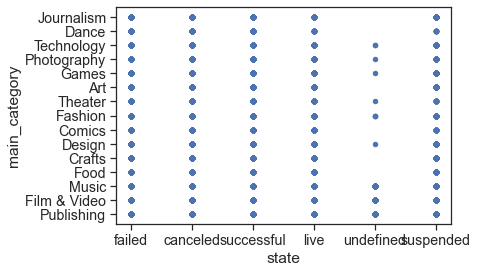

In [217]:
df_short.plot(kind='scatter', x='state', y='main_category')
##With that plot, I can see that most of the countries created startups for all the categories, although I can also see that no "Journalism", "Dance", "Crafts" startups were created in JP Japan

*I looked at the shape of the graph and made sure it is filtered*

df_short.shape

*I made sure I have all nesessary columns for the future analysis*

In [218]:
df_short.columns

Index(['category', 'main_category', 'state', 'backers', 'country',
       'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

I checked if the United States still have the most attemts for startups

In [219]:
df_short['country'].value_counts().head()

US      216320
GB       25662
CA       11249
AU        5876
N,0"      3787
Name: country, dtype: int64

## United States of America

I decided to create some subsets of data where only one country is defined for the most popular category of the startups in the country. Therefore, the United states have a great music industry, which must be positively correlated with the number of successful startups

In [220]:
df_us_ind = df_short[df_short['country'].str.contains('US')]
df_us_ind = df_us_ind[df_us_ind.main_category == 'Music']
df_us_ind = df_us_ind[df_us_ind['state'].str.contains('canceled')==False]
df_us_ind = df_us_ind[df_us_ind['state'].str.contains('live')==False]
df_us_ind = df_us_ind[df_us_ind['state'].str.contains('suspended')==False]
df_us_ind.head()

,category,main_category,state,backers,country,usd_pledged_real,usd_goal_real
3,Music,Music,failed,1,US,1.0,5000.0
18,Music,Music,successful,7,US,250.0,250.0
34,Music,Music,successful,92,US,13260.0,12000.0
41,Music,Music,successful,34,US,2100.0,2100.0
64,Rock,Music,failed,13,US,485.0,850.0


*I checked the statistics for successful vs failed startups*

In [221]:
df_us_ind['state'].value_counts()

failed        17345
successful    15306
Name: state, dtype: int64

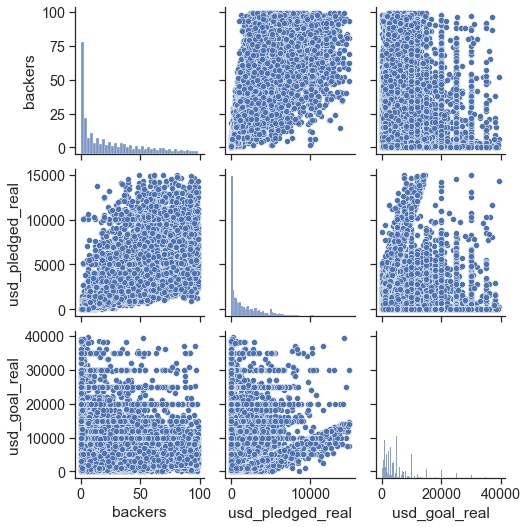

In [222]:
sns.pairplot(df_us_ind)

<AxesSubplot:xlabel='usd_pledged_real'>

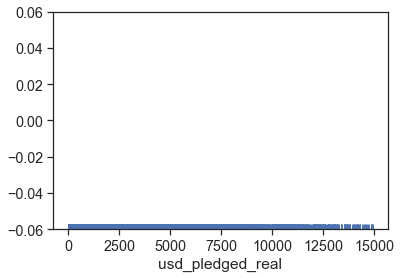

In [223]:
sns.rugplot(df_us_ind['usd_pledged_real'])

<AxesSubplot:xlabel='state', ylabel='count'>

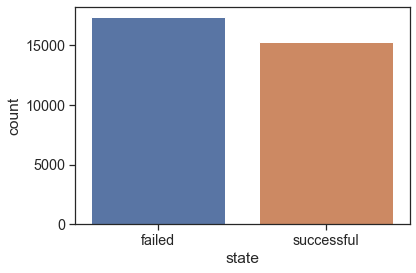

In [224]:
sns.countplot(x='state',data=df_us_ind)

<AxesSubplot:xlabel='usd_pledged_real', ylabel='Density'>

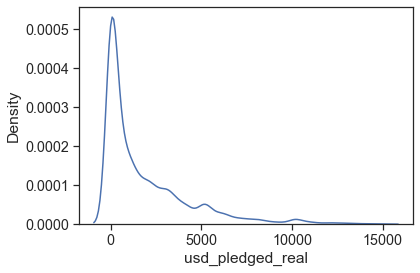

In [225]:
sns.kdeplot(df_us_ind['usd_pledged_real'])

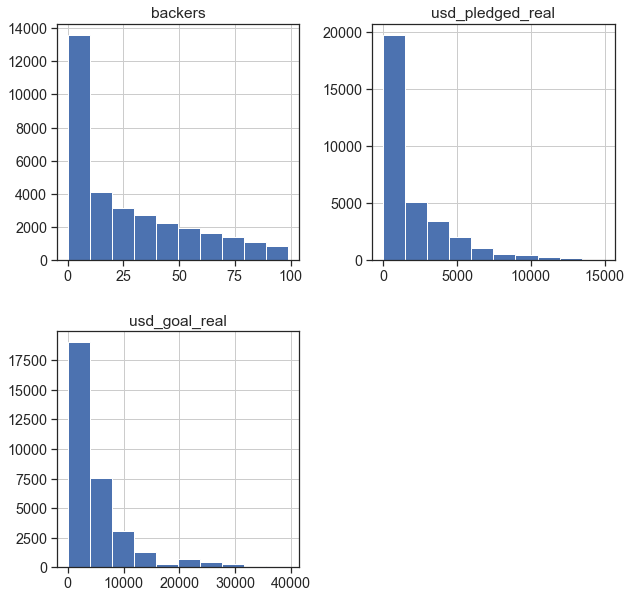

In [226]:
#histograms for each variable in dataset
df_us_ind = df_us_ind.hist(bins=10,figsize =(10,10))

## Great Britain

In [227]:
df_gb_ind = df_short[df_short['country'].str.contains('GB')]
df_gb_ind = df_gb_ind[df_gb_ind.main_category == 'Publishing']
df_gb_ind = df_gb_ind[df_gb_ind['state'].str.contains('canceled')==False]
df_gb_ind = df_gb_ind[df_gb_ind['state'].str.contains('live')==False]
df_gb_ind = df_gb_ind[df_gb_ind['state'].str.contains('suspended')==False]
df_gb_ind.head()

,category,main_category,state,backers,country,usd_pledged_real,usd_goal_real
0,Poetry,Publishing,failed,0,GB,0.00,1533.95
147,Young Adult,Publishing,failed,1,GB,1.43,14287.14
167,Fiction,Publishing,failed,29,GB,2082.74,3959.58
235,Poetry,Publishing,failed,1,GB,30.30,6060.97
288,Fiction,Publishing,failed,6,GB,42.81,64.87


*I checked the statistics for successful vs failed startups*

In [228]:
df_gb_ind['state'].value_counts()

failed        1671
successful     648
Name: state, dtype: int64

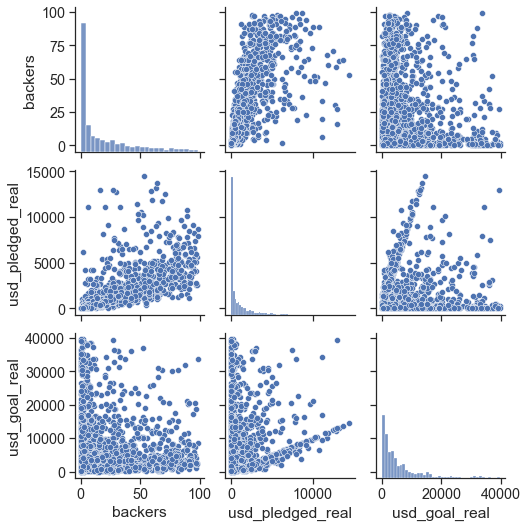

In [229]:
sns.pairplot(df_gb_ind)

<AxesSubplot:xlabel='usd_pledged_real'>

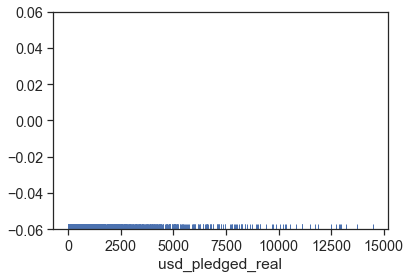

In [230]:
sns.rugplot(df_gb_ind['usd_pledged_real'])

<AxesSubplot:xlabel='state', ylabel='count'>

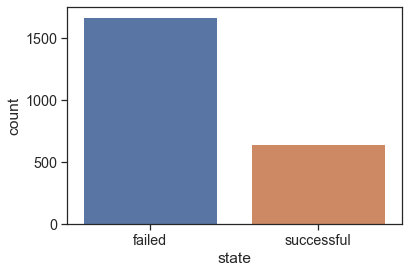

In [231]:
sns.countplot(x='state',data=df_gb_ind)

<AxesSubplot:xlabel='usd_pledged_real', ylabel='Density'>

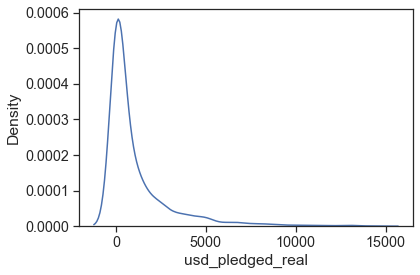

In [232]:
sns.kdeplot(df_gb_ind['usd_pledged_real'])

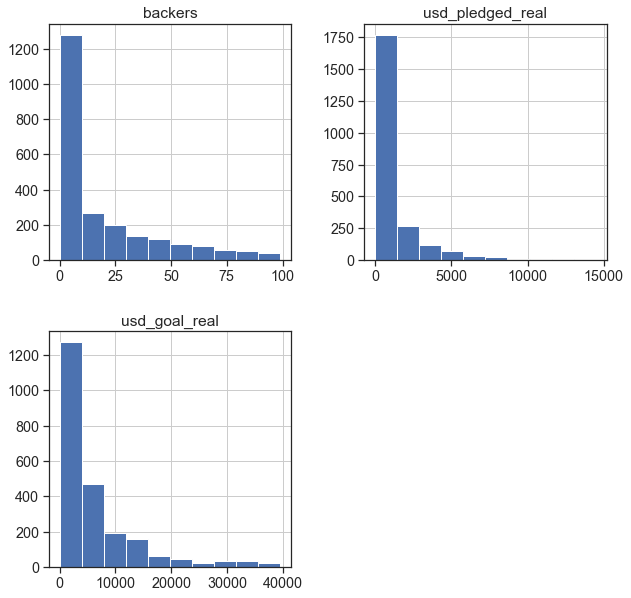

In [233]:
#histograms for each variable in dataset
df_gb_ind = df_gb_ind.hist(bins=10,figsize =(10,10))

## France: Art

I chose art for France, because it has a lot of museums, and the history of the country with Napoleon made the country full of antique arts 

In [234]:
df_fr_ind = df_short[df_short['country'].str.contains('FR')]
df_fr_ind = df_fr_ind[df_fr_ind.main_category == 'Art']
df_fr_ind = df_fr_ind[df_fr_ind['state'].str.contains('canceled')==False]
df_fr_ind = df_fr_ind[df_fr_ind['state'].str.contains('live')==False]
df_fr_ind = df_fr_ind[df_fr_ind['state'].str.contains('suspended')==False]
df_fr_ind.head()

,category,main_category,state,backers,country,usd_pledged_real,usd_goal_real
213,Performance Art,Art,failed,4,FR,100.35,826.42
7683,Illustration,Art,successful,11,FR,225.31,223.08
7724,Mixed Media,Art,failed,31,FR,1054.11,5600.99
15456,Digital Art,Art,failed,0,FR,0.00,5404.00
22481,Illustration,Art,failed,1,FR,1.13,563.40


*I checked the statistics for successful vs failed startups*

In [235]:
df_fr_ind['state'].value_counts()

failed        77
successful    49
Name: state, dtype: int64

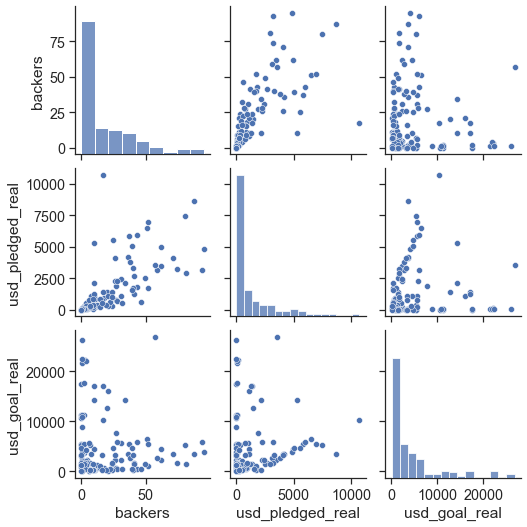

In [236]:
sns.pairplot(df_fr_ind)

<AxesSubplot:xlabel='usd_pledged_real'>

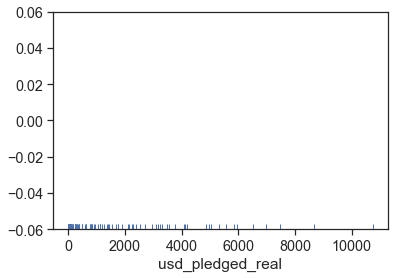

In [237]:
sns.rugplot(df_fr_ind['usd_pledged_real'])

<AxesSubplot:xlabel='state', ylabel='count'>

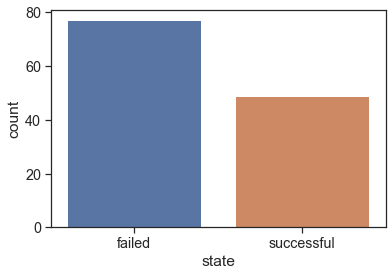

In [238]:
sns.countplot(x='state',data=df_fr_ind)

<AxesSubplot:xlabel='usd_pledged_real', ylabel='Density'>

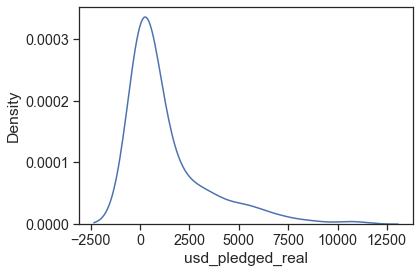

In [239]:
sns.kdeplot(df_fr_ind['usd_pledged_real'])

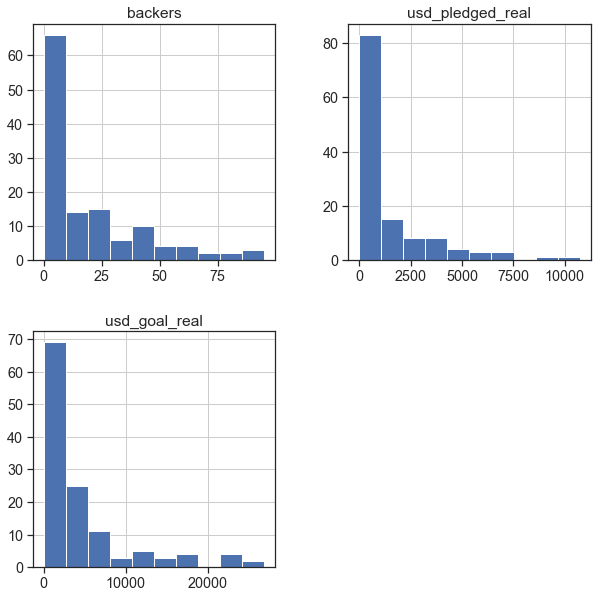

In [240]:
#histograms for each variable in dataset
df_fr_ind = df_fr_ind.hist(bins=10,figsize =(10,10))

## Italy: Fashion 

I chose Fashion filter for Italy since Italy is famous for its clothes brands

In [241]:
df_it_ind = df_short[df_short['country'].str.contains('IT')]
df_it_ind = df_it_ind[df_it_ind.main_category == 'Fashion']
df_it_ind = df_it_ind[df_it_ind['state'].str.contains('canceled')==False]
df_it_ind = df_it_ind[df_it_ind['state'].str.contains('live')==False]
df_it_ind = df_it_ind[df_it_ind['state'].str.contains('suspended')==False]
df_it_ind.head()

,category,main_category,state,backers,country,usd_pledged_real,usd_goal_real
61,Accessories,Fashion,failed,2,IT,150.73,13202.34
292,Apparel,Fashion,failed,1,IT,1.14,22824.02
3160,Apparel,Fashion,failed,25,IT,2331.39,17537.51
3196,Ready-to-wear,Fashion,failed,18,IT,322.00,10591.99
6839,Ready-to-wear,Fashion,failed,1,IT,28.00,1680.30


*I checked the statistics for successful vs failed startups*

In [242]:
df_it_ind['state'].value_counts()

failed        166
successful     10
Name: state, dtype: int64

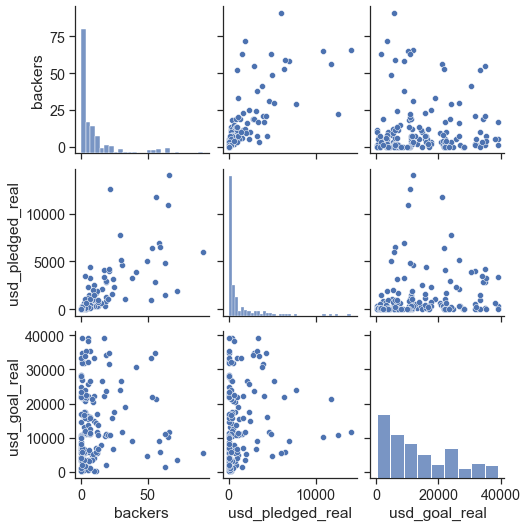

In [243]:
sns.pairplot(df_it_ind)

<AxesSubplot:xlabel='usd_pledged_real'>

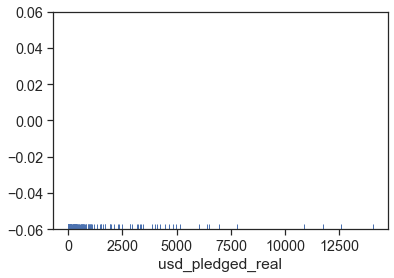

In [244]:
sns.rugplot(df_it_ind['usd_pledged_real'])

<AxesSubplot:xlabel='state', ylabel='count'>

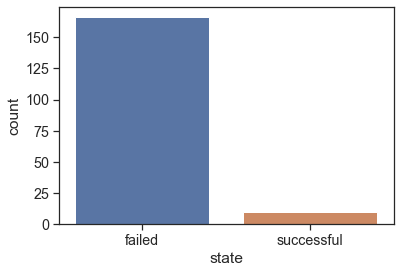

In [245]:
sns.countplot(x='state',data=df_it_ind)

### Therefore, We can see, that a popular insstry of the country does not always mean that the project will be successful. Statistically, around 10% of the startups succeed, and in countries such as France, Great Britain, and the US the statistics showed a positive results; whereas, Italian fashion startups were on the average percentile of the success rate